### Homework Assignment 6 - 100 points

#### For this homework set, there are specific data cleaning techniques that are done for you. Once the pre-processing is done, you will be asked to perfrom PCA and clustering on the data set. You will use the wine.csv file (posted on Canvas)

* You are to work by yourself in this assignment and turn in YOUR own work. This assignment will be submitted only as either a PDF or an HTML file in addition to your jupyter notebook file.

* This assignment is due on **Dec 2nd at 11:59 PM** no later and must be submitted in **CANVAS.**

* This assignment will be scanned for plagiarism

In [1]:
# Importing the following Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from matplotlib.ticker import MultipleLocator

In [2]:
# Load the homework data set

# Rename the columns based on their features.

columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'dilution_of_wines', 'proline']

df = pd.read_csv('wine.csv', names=columns, header=0)
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution_of_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Part 1: EDA & Data Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  dilution_of_wines     178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# Check for null values
df.isna().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
dilution_of_wines       0
proline                 0
dtype: int64

In [5]:
# Check for predefined number of clusters
df['class'].nunique()

3

In [6]:
# Distribution of Data into clusters
df['class'].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

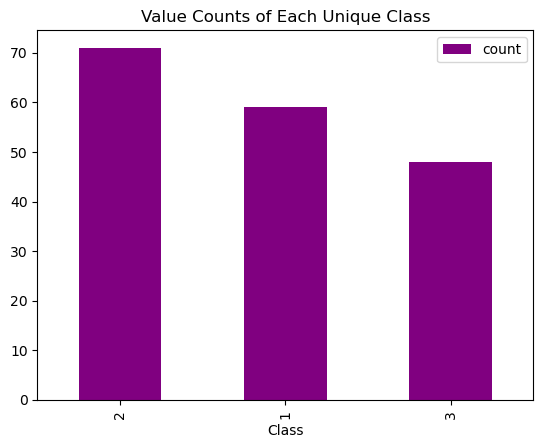

In [7]:
# Class Plots
df["class"].value_counts().plot.bar(color='Purple')
plt.xlabel("Class")
plt.title('Value Counts of Each Unique Class')
plt.legend()
plt.show()

In [8]:
# Utilizing the standard scaler method to get the values converted into integers.
X = df.iloc[:, 1:].values
from sklearn.preprocessing import StandardScaler
X_normal = scale(X)

In [9]:
# check the dimensions

X_normal.shape  # 178 rows and 13 columns


(178, 13)

In [10]:
# Let's look at the array

X_normal


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## (70 points) Part 2 - Implementation of PCA

### Question 1- Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result of the clustering  (5 Points)

In [11]:
pca = PCA()

principalComponents = pca.fit_transform(X_normal)
principalDf = pd.DataFrame(data = principalComponents)



principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

### Question 2 - Create a dataframe featuring the Principal components that you acquired through PCA and show the output (5 Points)

In [12]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


### Question 3 - Compute the amount of variance that each PCA explains. Dispay the output  (10 Points)


In [13]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

### Question 4 - Calculate the cummulative variances to 4 decimals places. Display the output (10 points)

In [14]:
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cumulative_variance))],
    'Cumulative Variance': cumulative_variance
})

cumulative_variance_df.round(4)

,Principal Component,Cumulative Variance
0,PC1,0.3620
1,PC2,0.5541
2,PC3,0.6653
3,PC4,0.7360
4,PC5,0.8016
5,PC6,0.8510
6,PC7,0.8934
7,PC8,0.9202
8,PC9,0.9424
9,PC10,0.9617


### Question 5 - Compute the Variance plot for PCA components obtained  and comment on the plot (10 points)


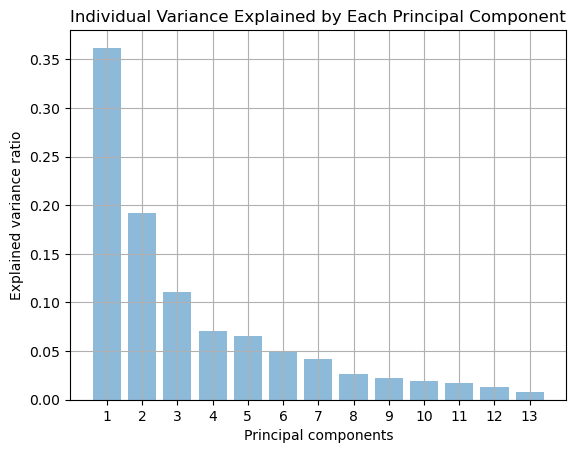

In [15]:
plt.figure()
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

The first three principal components account for the majority of the variance within the dataset. The variance between principal components starts to increase slower between the fourth and fifth component. Each principal component decreases in the amount of variance it contributes to the dataset compared to the principal component before it. 

### Question 6 - As our results are suggesting to use first 3 principal components for further computation, extract the three features from  the PCA_dataset into PCA1, PCA2, PCA3 (10 points)

In [16]:
pc = np.array([principalDf[0], principalDf[1], principalDf[2]])

### Question 7 - Create a dataframe for further clusering algorithms with PCA1, PCA2 and PCA3 as column headings. Display your results (10 points)

In [17]:
mainpc = pd.DataFrame(data = pc)
transposed_mainpc = mainpc.T
transposed_mainpc.columns = ['principal component 1', 'principal component 2', 'principal component 3']
transposed_mainpc.head()

,principal component 1,principal component 2,principal component 3
0,3.316751,1.443463,-0.165739
1,2.209465,-0.333393,-2.026457
2,2.516740,1.031151,0.982819
3,3.757066,2.756372,-0.176192
4,1.008908,0.869831,2.026688


### Question 8 - As done in class, go ahead and visualize the results of the 3D PCA. Properly label the x, y, and z- axis. Comment and summarize your results after the plot. (20 points)

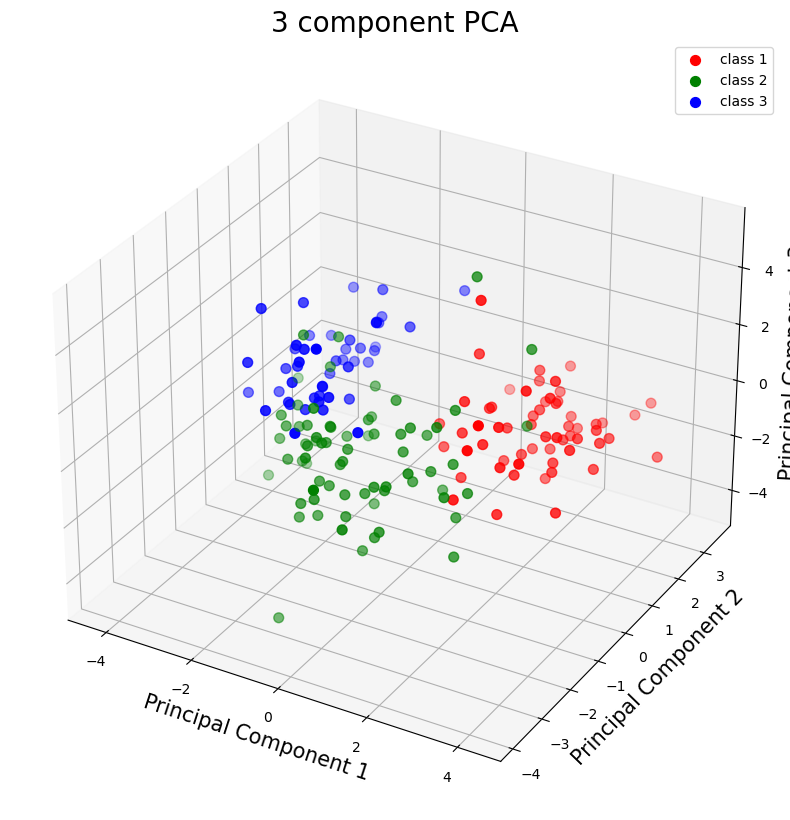

In [18]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

className = ['class 1', 'class 2', 'class 3']

class_ = [1,2,3]
colors = ['r', 'g', 'b']
for class_, color in zip(class_,colors):
    indicesToKeep = finalDf['class'] == class_
    ax.scatter(  transposed_mainpc.loc[indicesToKeep, 'principal component 1']
               , transposed_mainpc.loc[indicesToKeep, 'principal component 2']
               , transposed_mainpc.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(className)
ax.grid()

Principal Component Analysis (PCA) appears to have separated the wine into the three distinct classes we knew existed. It isolated the variables responsible for the most variance within the dataset and clustered the classes using the three components responsible for the most amount of variance. This reduced the time and computational power necessary to classify the wines and still provides relatively clear-cut classifications as seen on the graph. 

## Part 3 (30 points). New Dataset

Repeat Step 1 and Step 2 with new Data. Please locate a dataset that has more than 50 numerical attributes and then reduce its dimensions while retaining 95% of its information using the PCA methon

In [19]:
newdf = pd.read_csv('spambase_csv.csv')
newdf.info()
#this dataset's attributes indicate whether an email is spam or not spam 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [20]:
newdf['class'].nunique()

2

In [21]:
newdf['class'].value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

In [22]:
newdf.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

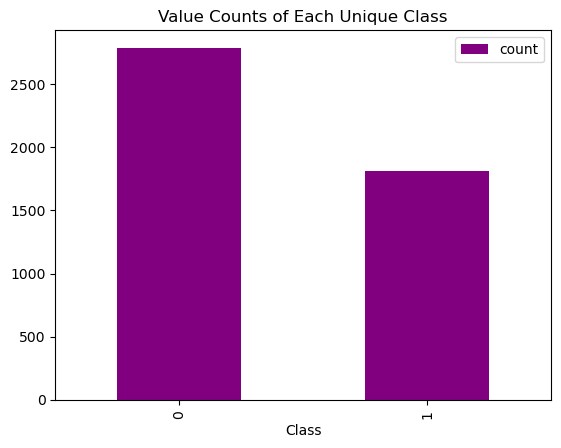

In [23]:
# Class Plots
newdf["class"].value_counts().plot.bar(color='Purple')
plt.title('Value Counts of Each Unique Class')
plt.xlabel("Class")
plt.legend()
plt.show()

In [24]:
newX = newdf.iloc[:, :-1].values
from sklearn.preprocessing import StandardScaler
newX_normal = scale(newX)

newX_normal

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01, ...,
        -4.52472762e-02,  4.52979198e-02, -8.72413388e-03],
       [ 3.45359395e-01,  5.19091945e-02,  4.35129540e-01, ...,
        -2.44326749e-03,  2.50562832e-01,  1.22832407e+00],
       [-1.45921392e-01, -1.65071912e-01,  8.51723390e-01, ...,
         1.45920848e-01,  2.22110599e+00,  3.25873251e+00],
       ...,
       [ 6.40127868e-01, -1.65071912e-01,  3.83734930e-02, ...,
        -1.19382054e-01, -2.36941335e-01, -2.72627750e-01],
       [ 2.80176333e+00, -1.65071912e-01, -5.56760578e-01, ...,
        -1.27482666e-01, -2.42072958e-01, -3.38603654e-01],
       [-3.42433707e-01, -1.65071912e-01,  7.32696576e-01, ...,
        -1.24236117e-01, -2.42072958e-01, -4.01280763e-01]])

In [25]:
newX_normal.shape

(4601, 57)

In [26]:
pcanew = PCA()

newprincipalComponents = pcanew.fit_transform(newX_normal)
newprincipalDf = pd.DataFrame(data = newprincipalComponents)


newfinalDf = pd.concat([newprincipalDf, newdf[['class']]], axis = 1)

In [27]:
newprincipalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.731750,-0.043026,-0.580662,-0.251143,-0.174836,-0.569760,0.050593,0.071795,0.415564,-0.809260,...,0.339344,-0.141209,-0.179884,0.292479,0.055205,-0.150697,0.006878,0.251490,-0.130953,0.002704
1,-1.185084,2.067850,0.036035,0.430459,-0.327619,-0.826688,0.490183,0.621681,-0.883679,0.351408,...,0.262410,-0.076499,0.040552,0.012735,-0.075829,-0.111192,-0.052531,-0.288312,-0.053123,0.002052
2,-1.467595,5.023754,3.277591,0.995065,0.641304,-2.784683,1.844471,-2.097819,1.982749,0.259473,...,-1.131376,-0.196368,0.713050,-0.088877,0.162983,-0.049972,-0.134171,-0.299933,-0.283606,0.000679
3,-0.805347,0.427503,-0.583107,-0.008242,-0.077464,0.547862,-0.404900,-0.459410,0.160853,0.260453,...,0.107400,0.219671,-0.069873,-0.054367,0.016271,0.038833,-0.004446,-0.019787,-0.004183,0.000369
4,-0.806279,0.426747,-0.585155,-0.008167,-0.077655,0.547753,-0.403780,-0.461120,0.160601,0.261989,...,0.106594,0.218626,-0.069100,-0.054522,0.016362,0.039134,-0.004213,-0.016724,-0.004529,0.000374


In [28]:
newexplained_variance = pcanew.explained_variance_ratio_

newexplained_variance

array([1.15647938e-01, 5.73232431e-02, 3.51430162e-02, 2.83010426e-02,
       2.71264533e-02, 2.56585925e-02, 2.48067162e-02, 2.41213829e-02,
       2.27243057e-02, 2.24025230e-02, 2.13495901e-02, 1.98263479e-02,
       1.95049511e-02, 1.92122694e-02, 1.90707479e-02, 1.86573498e-02,
       1.83972439e-02, 1.79540294e-02, 1.77660289e-02, 1.75932423e-02,
       1.74721670e-02, 1.71625291e-02, 1.69216274e-02, 1.65148205e-02,
       1.64313751e-02, 1.62164431e-02, 1.60588919e-02, 1.58708809e-02,
       1.53231701e-02, 1.51929718e-02, 1.46753433e-02, 1.45040605e-02,
       1.39942396e-02, 1.37141146e-02, 1.36249055e-02, 1.32548637e-02,
       1.28785944e-02, 1.26852434e-02, 1.23612373e-02, 1.21027257e-02,
       1.18351676e-02, 1.16841154e-02, 1.08616866e-02, 1.06745828e-02,
       1.02081965e-02, 1.01242658e-02, 9.20092874e-03, 8.57398624e-03,
       7.90050150e-03, 7.17719951e-03, 6.58955516e-03, 6.41601378e-03,
       5.87464653e-03, 5.35757517e-03, 4.56877856e-03, 3.33795195e-03,
      

In [29]:
newcumulative_variance = np.cumsum(newexplained_variance)

newcumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(newcumulative_variance))],
    'Cumulative Variance': newcumulative_variance
})

newcumulative_variance_df.round(4)

,Principal Component,Cumulative Variance
0,PC1,0.1156
1,PC2,0.1730
2,PC3,0.2081
3,PC4,0.2364
4,PC5,0.2635
5,PC6,0.2892
6,PC7,0.3140
7,PC8,0.3381
8,PC9,0.3609
9,PC10,0.3833


We see that in order to keep 95% of the variance, we need to keep the principal components up to and including PC47. This reduces our original dataframe by about 10 attributes, which still decreases time and computational power required for any machine learning tools utilized after this point. The visualization of individual variances is graphed below. 

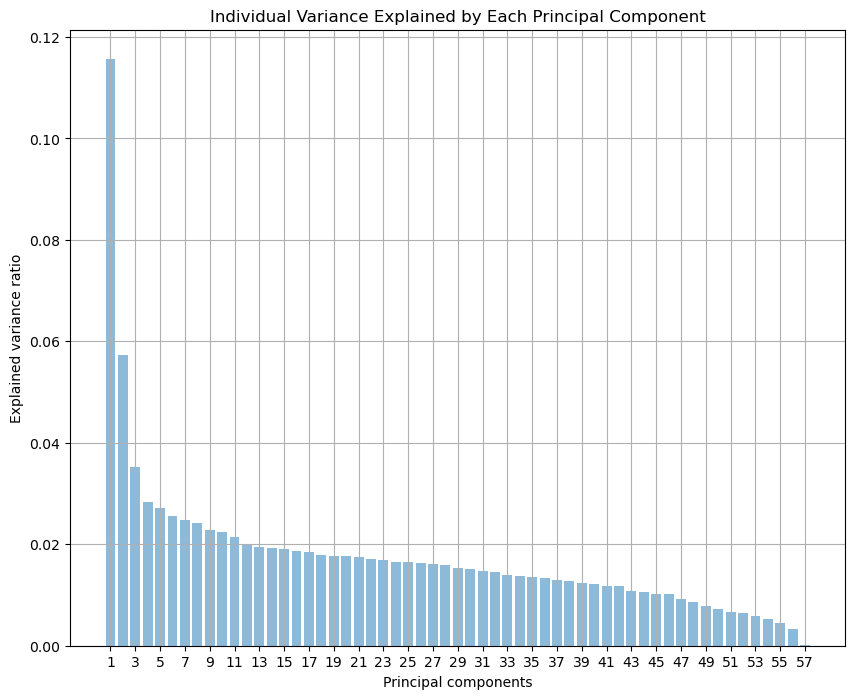

In [30]:
fig = plt.figure(figsize = (10,8))
plt.bar(range(1, len(newexplained_variance) + 1), newexplained_variance, alpha=0.5, align='center')
plt.xticks(np.arange(1, len(newexplained_variance) + 1, 2))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(range(1, len(newexplained_variance) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

The explained variance ratio graph illustrates that each principal component contributes less variance to the data set than the previous component did. After the third principal component, the amount of variance contributed decreases with each additional component. The first two or three principal components clearly contribute more variance to the dataframe because the space between the peak of each component significantly reduces when comparing the gap between the second and third to the third and fourth. 

In [31]:
newpc95Df = newprincipalDf.iloc[:, :47]
newpc95Df.columns = range(1, newpc95Df.shape[1] + 1)
newpc95Df

#this data frame keeps 95% of the variance
#as I stated before, it requires us to keep the principal components up to and including PC47
#this dataframe is what we would use to perform any additional computations or machine learning tools

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
0,-0.731750,-0.043026,-0.580662,-0.251143,-0.174836,-0.569760,0.050593,0.071795,0.415564,-0.809260,...,-0.258058,-0.104601,0.328918,-0.025611,0.072388,0.682891,0.052138,-0.162968,-0.208357,0.143936
1,-1.185084,2.067850,0.036035,0.430459,-0.327619,-0.826688,0.490183,0.621681,-0.883679,0.351408,...,0.051902,-0.532830,-0.163981,0.288200,0.378792,0.230267,0.139854,-0.156299,0.291900,-0.141545
2,-1.467595,5.023754,3.277591,0.995065,0.641304,-2.784683,1.844471,-2.097819,1.982749,0.259473,...,-0.555554,-1.216762,-1.672497,0.280127,0.052592,-0.394560,-0.709672,0.295599,-0.079436,-0.625527
3,-0.805347,0.427503,-0.583107,-0.008242,-0.077464,0.547862,-0.404900,-0.459410,0.160853,0.260453,...,0.002961,-0.254880,-1.088386,-0.382526,-0.278213,-0.467940,0.216300,-0.238498,-0.840444,0.410776
4,-0.806279,0.426747,-0.585155,-0.008167,-0.077655,0.547753,-0.403780,-0.461120,0.160601,0.261989,...,0.002230,-0.254747,-1.087952,-0.382583,-0.276466,-0.466795,0.216558,-0.238331,-0.840652,0.409227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-0.454406,-0.740464,-0.142942,-0.258755,0.386438,-0.549871,-0.041711,0.426852,-0.391706,0.390676,...,-0.623834,0.484573,0.360531,-0.668953,0.091673,-0.229323,-0.130889,0.262062,0.007747,0.031015
4597,-0.780016,-0.636617,-1.094297,0.436243,-1.106634,0.137893,-0.374169,1.488182,0.437543,0.405634,...,-0.109897,-0.524355,0.339855,1.429538,-0.491710,-0.148090,0.820998,0.610906,-0.492653,-0.238649
4598,-0.261878,-0.417820,0.333300,0.091170,0.037927,-0.484281,-0.061387,1.025764,-0.042442,0.444760,...,-0.735534,0.378626,0.851642,-0.440357,-0.759699,-0.581896,0.234284,0.353264,-0.246577,0.297979
4599,-0.589828,-0.661346,-0.578249,-0.188348,-0.147154,-0.190542,-0.308134,0.668868,-0.795742,0.567443,...,-1.217141,0.283375,-0.245986,-0.179494,-0.583077,0.248574,0.723676,0.013666,-0.309831,-0.131305


In [32]:
#to graph it I'll isolate the first 3 components 

newpc3 = newprincipalDf.iloc[:, :3]
newpc3.columns = ['principal component 1', 'principal component 2', 'principal component 3']
newpc3

,principal component 1,principal component 2,principal component 3
0,-0.731750,-0.043026,-0.580662
1,-1.185084,2.067850,0.036035
2,-1.467595,5.023754,3.277591
3,-0.805347,0.427503,-0.583107
4,-0.806279,0.426747,-0.585155
...,...,...,...
4596,-0.454406,-0.740464,-0.142942
4597,-0.780016,-0.636617,-1.094297
4598,-0.261878,-0.417820,0.333300
4599,-0.589828,-0.661346,-0.578249


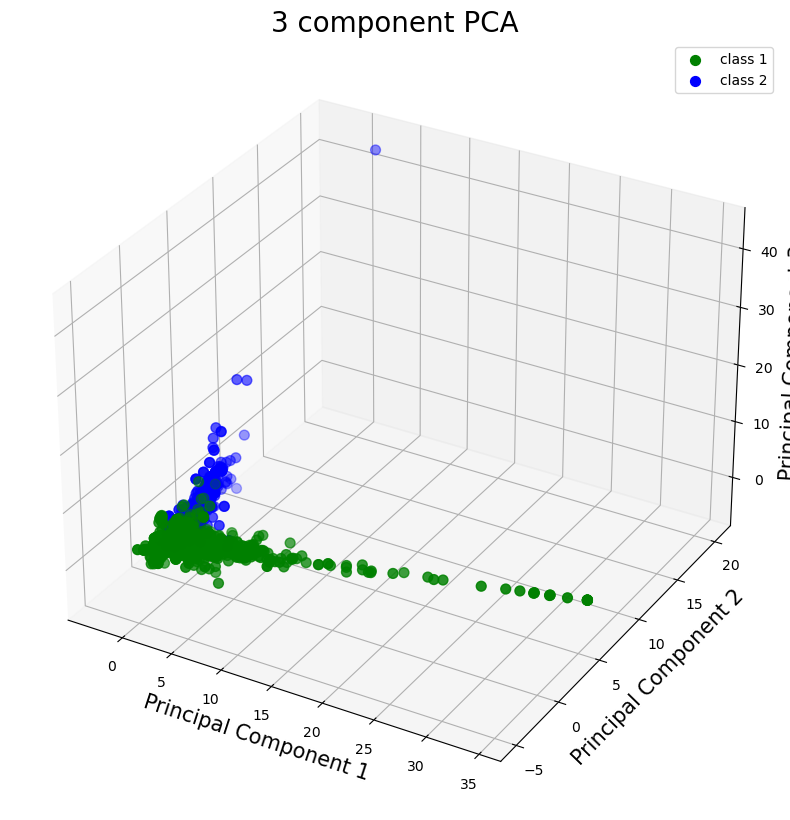

In [33]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

className = ['class 1', 'class 2', 'class 3']

class_ = [0, 1]
colors = ['g', 'b']
for class_, color in zip(class_,colors):
    indicesToKeep = newfinalDf['class'] == class_
    ax.scatter(  newpc3.loc[indicesToKeep, 'principal component 1']
               , newpc3.loc[indicesToKeep, 'principal component 2']
               , newpc3.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(className)
ax.grid()

There are many rows in this dataset, attributing to the density of the data points, but we can see that PCA with the first three variables did a decent job of classifying an email entry as spam or not spam. I only used the first three principal components because that's all we're able to visualize. However, using the first 48 principal components would do a much better job classifying the emails using machine learning techniques such as clustering. 